In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()

<AxesSubplot: xlabel='samples', ylabel='seconds'>

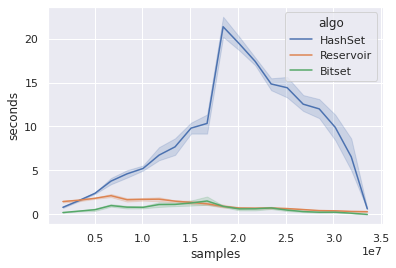

In [2]:
data = pd.read_json("benchmark.json")

sns.lineplot(data=data, x = "samples", y="seconds", hue="algo")

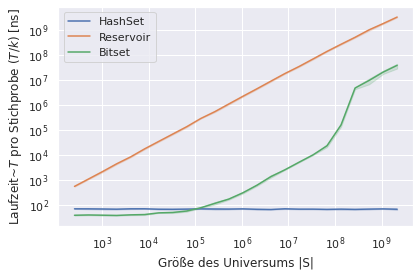

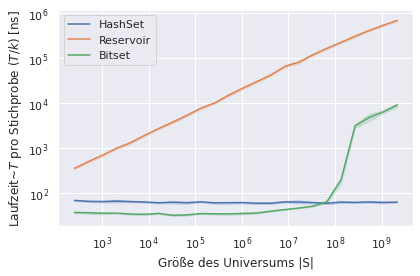

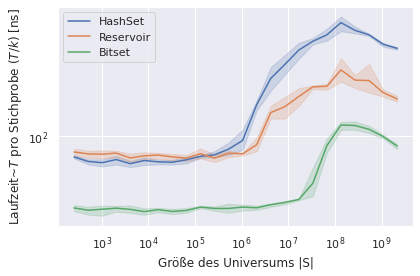

In [54]:
data = pd.read_json("benchmark_scale.json", lines=True)
data["reltime"] = (data["seconds"] / data["samples"]) * 1e9

for variant, series in enumerate(['k=10','k=sqrt(N)', 'k=N/4']):
    sns.lineplot(data=data[data.series == series], x="size", y="reltime", hue="algo", hue_order=['HashSet', 'Reservoir', 'Bitset'])
    plt.loglog(base=10)
    plt.xlabel("Größe des Universums |S|")
    plt.ylabel("Laufzeit~$T$ pro Stichprobe ($T / k$) [ns]")
    plt.legend()
    plt.tight_layout()
    plt.savefig("gnm_scale%d.pdf" % variant)
    plt.show()